In [1]:
# for use in tutorial and development; do not include this `sys.path` change in production:
import sys ; sys.path.insert(0, "../")

# reproduce results from the "InGram" paper

This is an attempt to reproduce the _graph of relations_ example given in `lee2023ingram`

## environment

In [2]:
import os
import pathlib
import typing

from icecream import ic
from pyinstrument import Profiler
import matplotlib.pyplot as plt

import textgraphs

In [3]:
%load_ext watermark

In [4]:
%watermark

Last updated: 2024-01-03T11:28:32.198729-08:00

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.18.1

Compiler    : Clang 13.0.0 (clang-1300.0.29.30)
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [5]:
%watermark --iversions

textgraphs: 0.2.4
sys       : 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
matplotlib: 3.8.2



## load example graph

load from a JSON file which replicates the data for the "Figure 3" example

In [6]:
graph: textgraphs.GraphOfRelations = textgraphs.GraphOfRelations(
    textgraphs.SimpleGraph()
)

ingram_path: pathlib.Path = pathlib.Path(os.getcwd()) / "ingram.json"

graph.load_ingram(
    ingram_path,
    debug = False,
)

set up the statistical stack profiling

In [7]:
profiler: Profiler = Profiler()
profiler.start()

## decouple graph edges into "seeds"

In [8]:
graph.seeds(
    debug = True,
)


--- triples in source graph ---


ic| edge.src_node: 0, rel_id: 1, edge.dst_node: 1
ic| edge.src_node: 0, rel_id: 0, edge.dst_node: 2
ic| edge.src_node: 0, rel_id: 0, edge.dst_node: 3
ic| edge.src_node: 4, rel_id: 2, edge.dst_node: 2
ic| edge.src_node: 4, rel_id: 2, edge.dst_node: 3
ic| edge.src_node: 4, rel_id: 1, edge.dst_node: 5
ic| edge.src_node: 6, rel_id: 1, edge.dst_node:

 Steven_Spielberg Profession Director
 Steven_Spielberg Directed Catch_Me_If_Can
 Steven_Spielberg Directed Saving_Private_Ryan
 Tom_Hanks ActedIn Catch_Me_If_Can
 Tom_Hanks ActedIn Saving_Private_Ryan
 Tom_Hanks Profession Actor


 5
ic| edge.src_node: 6, rel_id: 2, edge.dst_node: 7
ic| edge.src_node: 6, rel_id: 4, edge.dst_node: 8
ic| edge.src_node: 9, rel_id: 5, edge.dst_node: 10
ic| edge.src_node: 9, rel_id: 4, edge.dst_node: 10
ic| edge.src_node: 9, rel_id: 3, edge.dst_node: 8
ic| edge.src_node: 11, rel_id: 4, edge.dst_node: 12
ic| edge.src_node: 11, rel_id: 3, edge.dst_node: 12
ic| edge.src_node: 11, rel_id: 3, edge.dst_node: 8


 Mark_Hamil Profession Actor
 Mark_Hamil ActedIn Star_Wars
 Mark_Hamil BornIn California
 Brad_Pitt Nationality USA
 Brad_Pitt BornIn USA
 Brad_Pitt LivedIn California
 Clint_Eastwood BornIn San_Francisco
 Clint_Eastwood LivedIn San_Francisco
 Clint_Eastwood LivedIn California


In [9]:
graph.trace_source_graph()


--- nodes in source graph ---
n:  0, Steven_Spielberg
 head: []
 tail: [(0, 'Profession', 1), (0, 'Directed', 2), (0, 'Directed', 3)]
n:  1, Director
 head: [(0, 'Profession', 1)]
 tail: []
n:  2, Catch_Me_If_Can
 head: [(0, 'Directed', 2), (4, 'ActedIn', 2)]
 tail: []
n:  3, Saving_Private_Ryan
 head: [(0, 'Directed', 3), (4, 'ActedIn', 3)]
 tail: []
n:  4, Tom_Hanks
 head: []
 tail: [(4, 'ActedIn', 2), (4, 'ActedIn', 3), (4, 'Profession', 5)]
n:  5, Actor
 head: [(4, 'Profession', 5), (6, 'Profession', 5)]
 tail: []
n:  6, Mark_Hamil
 head: []
 tail: [(6, 'Profession', 5), (6, 'ActedIn', 7), (6, 'BornIn', 8)]
n:  7, Star_Wars
 head: [(6, 'ActedIn', 7)]
 tail: []
n:  8, California
 head: [(6, 'BornIn', 8), (9, 'LivedIn', 8), (11, 'LivedIn', 8)]
 tail: []
n:  9, Brad_Pitt
 head: []
 tail: [(9, 'Nationality', 10), (9, 'BornIn', 10), (9, 'LivedIn', 8)]
n: 10, USA
 head: [(9, 'Nationality', 10), (9, 'BornIn', 10)]
 tail: []
n: 11, Clint_Eastwood
 head: []
 tail: [(11, 'BornIn', 12), (11,

## construct a _graph of relations_

Transform the graph data into _graph of relations_

In [10]:
graph.construct_gor(
	debug = True,
)

ic| node_id: 0, len(seeds): 3
ic| trans_arc: TransArc(pair_key=(0, 1),
                        a_rel=1,
                        b_rel=0,
                        node_id=


--- transformed triples ---
 (0, 1) Profession.tail Steven_Spielberg Directed.tail


0,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(0, 1),
                        a_rel=1,
                        b_rel=0,
                        node_id=0,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(0, 0),
                        a_rel=0,
                        b_rel=0,
                        node_id=0,
                        a_dir=<RelDir.TAIL:


 (0, 1) Profession.tail Steven_Spielberg Directed.tail

 (0, 0) Directed.tail Steven_Spielberg Directed.tail


 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| node_id: 1, len

(seeds): 1
ic| node_id: 2, len(seeds): 2
ic| trans_arc: TransArc(pair_key=(0, 

 (0, 2) Directed.head Catch_Me_If_Can ActedIn.head


2),
                        a_rel=0,
                        b_rel=2,
                        node_id=2,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)
ic| node_id: 3, len(seeds): 2
ic| trans_arc: TransArc(pair_key=(0, 2),
                        a_rel=0,
                        b_rel=2,
                        node_id=3,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir


 (0, 2) Directed.head Saving_Private_Ryan ActedIn.head


=<RelDir.HEAD: 0>)
ic| node_id: 4, len(seeds): 3
ic| trans_arc: TransArc(pair_key=(2, 2),


 (2, 2) ActedIn.tail Tom_Hanks ActedIn.tail



                        a_rel=2,
                        b_rel=2,
                        node_id=4,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(1, 2),
                        a_rel=2,
                        b_rel=1,
                        node_id=4,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(1, 2),
                        a_rel=2,
                        b_rel=1,
                        node_id=4,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic|


 (1, 2) ActedIn.tail Tom_Hanks Profession.tail

 (1, 2) ActedIn.tail Tom_Hanks Profession.tail



 node_id: 5, len(seeds): 2
ic| trans_arc: TransArc(pair_key=(1, 1),
                        a_rel=1,
                        b_rel=1,
                        node_id=5,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)
ic| node_id: 6, len(seeds): 3
ic| trans_arc: TransArc(pair_key=(1, 2),
                        a_rel=1,
                        b_rel=2,
                        node_id=6,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(1, 4),
                        a_rel=1,
                        b_rel=4,
                        node_id=6,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(2, 4),
                        a_rel=2,
                        b_rel=4,
                        node_id=6,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.T

 (1, 1) Profession.head Actor Profession.head

 (1, 2) Profession.tail Mark_Hamil ActedIn.tail

 (1, 4) Profession.tail Mark_Hamil BornIn.tail

 (2, 4) ActedIn.tail Mark_Hamil BornIn.tail

 (3, 4) BornIn.head California LivedIn.head


a_rel=4,
                        b_rel=3,
                        node_id=8,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)
ic| trans_arc: TransArc(pair_key=(3, 4),
                        a_rel=4,
                        b_rel=3,
                        node_id=8,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)
ic| trans_arc: TransArc(pair_key=(3, 3),
                        a_rel=3,
                        b_rel=3,
                        node_id=8,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)
ic| node_id: 9, len(seeds): 3
ic| trans_arc: TransArc(pair_key=(4, 5),
                        a_rel=5,
                        b_rel=4,
                        node_id=9,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(3, 5),
                        a_rel=5,
         


 (3, 4) BornIn.head California LivedIn.head

 (3, 3) LivedIn.head California LivedIn.head

 (4, 5) Nationality.tail Brad_Pitt BornIn.tail

 (3, 5) Nationality.tail Brad_Pitt LivedIn.tail

 (3, 4) BornIn.tail Brad_Pitt LivedIn.tail


b_rel=3,
                        node_id=9,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| node_id: 10, len(seeds): 2
ic| trans_arc: TransArc(pair_key=(4, 5),
                        a_rel=5,
                        b_rel=4,
                        node_id=10,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)
ic| node_id: 11, len(seeds): 3
ic| trans_arc: TransArc(pair_key=(3, 4),
                        a_rel=4,
                        b_rel=3,
                        node_id=11,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(


 (4, 5) Nationality.head USA BornIn.head

 (3, 4) BornIn.tail Clint_Eastwood LivedIn.tail

 (3, 4) BornIn.tail Clint_Eastwood LivedIn.tail


pair_key=(3, 4),
                        a_rel=4,
                        b_rel=3,
                        node_id=11,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| trans_arc: TransArc(pair_key=(3, 3),
                        a_rel=3,
                        b_rel=3,
                        node_id=11,
                        a_dir=<RelDir.TAIL: 1>,
                        b_dir=<RelDir.TAIL: 1>)
ic| node_id: 12, len(seeds): 2
ic| trans_arc: TransArc(pair_key=(3, 4),
                        a_rel=4,
                        b_rel=3,
                        node_id=12,
                        a_dir=<RelDir.HEAD: 0>,
                        b_dir=<RelDir.HEAD: 0>)



 (3, 3) LivedIn.tail Clint_Eastwood LivedIn.tail

 (3, 4) BornIn.head San_Francisco LivedIn.head



In [11]:
scores: typing.Dict[ tuple, float ] = graph.get_affinity_scores(
    debug = True,
)


--- collect shared entity tallies ---
0 Directed
 h: 4 dict_items([(2, 4.0)])
 t: 6 dict_items([(0, 3.0), (1, 3.0)])
1 Profession
 h: 3 dict_items([(1, 3.0)])
 t: 10 dict_items([(0, 3.0), (2, 5.0), (4, 2.0)])
2 ActedIn
 h: 4 dict_items([(0, 4.0)])
 t: 10 dict_items([(1, 5.0), (2, 3.0), (4, 2.0)])
3 LivedIn
 h: 8 dict_items([(3, 3.0), (4, 5.0)])
 t: 10 dict_items([(3, 3.0), (4, 5.0), (5, 2.0)])
4 BornIn
 h: 7 dict_items([(3, 5.0), (5, 2.0)])
 t: 11 dict_items([(1, 2.0), (2, 2.0), (3, 5.0), (5, 2.0)])
5 Nationality
 h: 2 dict_items([(4, 2.0)])
 t: 4 dict_items([(3, 2.0), (4, 2.0)])

--- reproduce affinity scores ---


In [12]:
ic(scores);

ic| scores: {(0, 0): 0.3,
             (0, 1): 0.2653846153846154,
             (0, 2): 0.34285714285714286,
             (1, 1): 0.23076923076923078,
             (1, 2): 0.3708791208791209,
             (1, 4): 0.13247863247863248,
             (2, 2): 0.21428571428571427,
             (2, 4): 0.12698412698412698,
             (3, 3): 0.3333333333333333,
             (3, 4): 0.5555555555555556,
             (3, 5): 0.2222222222222222,
             (4, 5): 0.4444444444444444}


## visualize the transform results

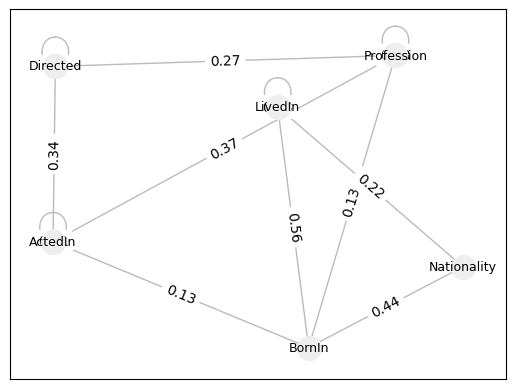

In [13]:
graph.render_gor(scores)
plt.show()

## analysis

As the results below above illustrate, the computed _affinity scores_ differ from what is published in `lee2023ingram`. After trying several different variations of interpretation for the paper's descriptions, the current approach provides the closest approximation that we have obtained.

In [14]:
graph.trace_metrics(scores)

(0, 0) Directed Directed
 0.3 None 0.0
(0, 1) Directed Profession
 0.27 0.22 -0.2062937062937063
(0, 2) Directed ActedIn
 0.34 0.5 0.3142857142857143
(1, 1) Profession Profession
 0.23 None 0.0
(1, 2) Profession ActedIn
 0.37 0.33 -0.12387612387612387
(1, 4) Profession BornIn
 0.13 0.11 -0.20435120435120435
(2, 2) ActedIn ActedIn
 0.21 None 0.0
(2, 4) ActedIn BornIn
 0.13 0.11 -0.15440115440115434
(3, 3) LivedIn LivedIn
 0.33 None 0.0
(3, 4) LivedIn BornIn
 0.56 0.81 0.3141289437585734
(3, 5) LivedIn Nationality
 0.22 0.11 -1.02020202020202
(4, 5) BornIn Nationality
 0.44 0.36 -0.2345679012345679


## statistical stack profile instrumentation

In [15]:
profiler.stop()

In [16]:
profiler.print()


  _     ._   __/__   _ _  _  _ _/_   Recorded: 11:28:32  Samples:  2252
 /_//_/// /_\ / //_// / //_'/ //     Duration: 3.217     CPU time: 3.729
/   _/                      v4.6.1

Program: /Users/paco/src/textgraphs/venv/lib/python3.10/site-packages/ipykernel_launcher.py -f /Users/paco/Library/Jupyter/runtime/kernel-66029019-5c49-4e0d-8fbf-517b18fc3377.json

3.216 IPythonKernel.dispatch_shell  ipykernel/kernelbase.py:373
└─ 3.192 IPythonKernel.execute_request  ipykernel/kernelbase.py:716
      [8 frames hidden]  ipykernel, IPython
         3.162 ZMQInteractiveShell.run_ast_nodes  IPython/core/interactiveshell.py:3391
         ├─ 1.650 <module>  ../ipykernel_63270/3358887201.py:1
         │  └─ 1.650 GraphOfRelations.construct_gor  textgraphs/gor.py:289
         │     ├─ 1.317 IceCreamDebugger.__call__  icecream/icecream.py:204
         │     │     [24 frames hidden]  icecream, colorama, ipykernel, thread...
         │     │        0.752 lock.acquire  <built-in>
         │     └─ 0.33

## outro

_\[ more parts are in progress, getting added to this demo \]_